<a href="https://colab.research.google.com/github/natreis02/Data_Analytic/blob/main/correlation_and_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Questões Iniciais - Banco de dados house_data.csv.xls

**Considerando a base de dados kc_house_data.csv responda as questões de 1
a 6 abaixo:**


 1. Codifique e exiba a matriz de correlação entre as variáveis
numéricas.Além disso, qual é a correlação entre o preço *price* e o número de quartos *bedrooms*? Existe alguma diferença na correlação quando consideramos apenas casas com uma área total *sqft_living* superior a 2000 pés quadrados?

In [ ]:
from google.colab import files
import pandas as pd

# Upload do arquivo CSV
uploaded = files.upload()

df = pd.read_csv(next(iter(uploaded)))

# Exiba as primeiras linhas do DataFrame
print(df.head())

Saving house_data.csv.xls to house_data.csv.xls
           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0          n     0  ...      7        1180              0   
1      7242     2.0          n     0  ...      7        2170            400   
2     10000     1.0          n     0  ...      6         770              0   
3      5000     1.0          n     0  ...      7        1050            910   
4      8080     1.0          n     0  ...      8        1680              0   

   yr_bu

In [ ]:
import io
# Selecionar apenas as colunas numéricas
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Calculando a matriz de correlação entre as variáveis numéricas
correlation_matrix = numeric_cols.corr()

# Exibindo a matriz de correlação
print("\nMatriz de Correlação entre as Variáveis Numéricas:")
print(correlation_matrix)

# Calculando a correlação entre o preço (price) e o número de quartos (bedrooms)
price_bedrooms_corr = df['price'].corr(df['bedrooms'])

print("\nCorrelação entre o preço (price) e o número de quartos (bedrooms):", price_bedrooms_corr)

# Filtrando apenas as casas com uma área total (sqft_living) superior a 2000 pés quadrados
df_large_sqft = df[df['sqft_living'] > 2000]

# Calculando a correlação entre o preço (price) e o número de quartos (bedrooms) para essas casas
large_sqft_price_bedrooms_corr = df_large_sqft['price'].corr(df_large_sqft['bedrooms'])

print("\nCorrelação entre o preço (price) e o número de quartos (bedrooms) para casas com sqft_living > 2000:", large_sqft_price_bedrooms_corr)


Matriz de Correlação entre as Variáveis Numéricas:
                     id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000  0.005779  0.013855   0.007435     0.000415 -0.132510   
price          0.005779  1.000000  0.299207   0.521193     0.702199  0.090720   
bedrooms       0.013855  0.299207  1.000000   0.539449     0.573915  0.028929   
bathrooms      0.007435  0.521193  0.539449   1.000000     0.764810  0.091268   
sqft_living    0.000415  0.702199  0.573915   0.764810     1.000000  0.167809   
sqft_lot      -0.132510  0.090720  0.028929   0.091268     0.167809  1.000000   
floors         0.012260  0.276954  0.213565   0.494247     0.392802  0.021320   
view           0.035295  0.398731  0.090767   0.205681     0.293149  0.064464   
condition     -0.021744  0.044596  0.023435  -0.089029    -0.047375 -0.019324   
grade          0.012872  0.651100  0.360955   0.660915     0.763526  0.121719   
sqft_above    -0.007168  0.607763  0.464872   0.686311   

Existe uma diferença de aproximadamente 0.17 (17%) na correlação se considerarmos casas com sqft_living > 2000.

2. Existe alguma correlação entre o preço *price* e a área total da casa *sqft_living*, considerando apenas casas com pelo menos dois banheiros *bathrooms*?

In [ ]:
# Filtrar apenas as casas com pelo menos dois banheiros
df_two_bathrooms = df[df['bathrooms'] >= 2]

# Calcular a correlação entre o preço (price) e a área total da casa (sqft_living)
price_sqft_living_corr = df_two_bathrooms['price'].corr(df_two_bathrooms['sqft_living'])

print("Correlação entre o preço (price) e a área total da casa (sqft_living) para casas com pelo menos dois banheiros:", price_sqft_living_corr)


Correlação entre o preço (price) e a área total da casa (sqft_living) para casas com pelo menos dois banheiros: 0.7067107107996193


Sim, há uma correlação alta entre as duas variáveis.

3. Como a quantidade de banheiros *bathrooms* influencia na correlação
entre a área total da casa *sqft_living* e o preço *price*?

In [ ]:
# Quantidade de banheiros
df['bathrooms'] = df['bathrooms'].round().astype(int)

# Calcular a correlação entre a área total da casa (sqft_living) e o preço (price) para cada quantidade de banheiros
correlation_by_bathrooms = df.groupby('bathrooms').apply(lambda x: x['price'].corr(x['sqft_living']))

print("Correlação entre a área total da casa (sqft_living) e o preço (price) para cada quantidade de banheiros:")
print(correlation_by_bathrooms)


Correlação entre a área total da casa (sqft_living) e o preço (price) para cada quantidade de banheiros:
bathrooms
0    0.920514
1    0.363722
2    0.558508
3    0.591643
4    0.615611
5    0.758973
6    0.611126
7    1.000000
8    0.986925
dtype: float64


A correlação entre a área total da casa (sqft_living) e o preço (price) varia de acordo com a quantidade de banheiros:

Para casas com 0 banheiros, a correlação é alta, indicando uma forte relação linear entre a área total da casa e o preço.
Para casas com 1 banheiro, a correlação é baixa, mas ainda positiva, sugerindo uma relação moderada entre a área total da casa e o preço.
Para casas com 2, 3 e 4 banheiros, a correlação é moderada, indicando uma relação razoável entre a área total da casa e o preço.
Para casas com 5 e 6 banheiros, a correlação é alta, indicando uma forte relação linear entre a área total da casa e o preço.
Para casas com 7 e 8 banheiros, a correlação é perfeita (1.0), o que sugere uma relação linear direta e muito forte entre a área total da casa e o preço, embora seja importante observar que pode haver poucos dados nessas categorias para fazer uma generalização robusta.

4. Qual é a relação entre a condição da casa *condition* e o preço *price*,
considerando apenas casas com uma área total *sqft_living* superior a
3000 pés quadrados?

In [ ]:
# Filtrar apenas as casas com uma área total superior a 3000 pés quadrados
df_large_sqft = df[df['sqft_living'] > 3000]

# Calcular a correlação entre a condição da casa (condition) e o preço (price) para casas com uma área total superior a 3000 pés quadrados
price_condition_corr = df_large_sqft['price'].corr(df_large_sqft['condition'])

print("Correlação entre a condição da casa (condition) e o preço (price) para casas com uma área total superior a 3000 pés quadrados:", price_condition_corr)


Correlação entre a condição da casa (condition) e o preço (price) para casas com uma área total superior a 3000 pés quadrados: 0.10527844723732609


5. Existe alguma correlação entre a localização geográfica *lat* e *long* e o
preço *price* para casas com pelo menos três quartos bedrooms?

In [ ]:
# Filtrar apenas as casas com pelo menos três quartos
df_three_bedrooms = df[df['bedrooms'] >= 3]

# Calcular a correlação entre a localização geográfica (lat e long) e o preço (price) para casas com pelo menos três quartos
price_location_corr = df_three_bedrooms[['lat', 'long', 'price']].corr()

print("Correlação entre a localização geográfica (lat e long) e o preço (price) para casas com pelo menos três quartos:")
print(price_location_corr)


Correlação entre a localização geográfica (lat e long) e o preço (price) para casas com pelo menos três quartos:
            lat      long     price
lat    1.000000 -0.122460  0.312555
long  -0.122460  1.000000 -0.007275
price  0.312555 -0.007275  1.000000


Não, os valores de correlação foram muito baixos e no entanto as variáveis não influenciam de maneira significativa o problema.

6. Calcule a correlação entre uma variável categórica(*waterfront*) e uma
variável numérica(*price*) usando ANOVA.

In [ ]:
from scipy.stats import f_oneway

# Dividir o preço (price) em grupos com base na variável categórica waterfront
waterfront_groups = [df[df['waterfront'] == category]['price'] for category in df['waterfront'].unique()]

# Calcular a correlação usando ANOVA
anova_result = f_oneway(*waterfront_groups)

print("Estatísticas F:", anova_result.statistic)
print("Valor p:", anova_result.pvalue)


Estatísticas F: 964.5733248785583
Valor p: 2.97380815121432e-202


##Questões Finais - Banco de dados car_price.csv.xls

Considerando a base de dados car_price.csv responda as questões de 7 a 11 abaixo:

7. Codifique e exiba a Matriz de correlação para as variáveis numéricas e dê exemplos de correlações positivas, negativas e neutras.

In [ ]:
from google.colab import files
import pandas as pd

# Upload do arquivo CSV
uploaded = files.upload()

df = pd.read_csv(next(iter(uploaded)))

# Exiba as primeiras linhas do DataFrame
print(df.head())

Saving car_price.csv.xls to car_price.csv.xls
            Make                            Model    Price  Year  Kilometer  \
0          Honda              Amaze 1.2 VX i-VTEC   505000  2017      87150   
1  Maruti Suzuki                  Swift DZire VDI   450000  2014      75000   
2        Hyundai             i10 Magna 1.2 Kappa2   220000  2011      67000   
3         Toyota                         Glanza G   799000  2019      37500   
4         Toyota  Innova 2.4 VX 7 STR [2016-2020]  1950000  2018      69000   

  Fuel Type Transmission   Location   Color   Owner Seller Type   Engine  \
0    Petrol       Manual       Pune    Grey   First   Corporate  1198 cc   
1    Diesel       Manual   Ludhiana   White  Second  Individual  1248 cc   
2    Petrol       Manual    Lucknow  Maroon   First  Individual  1197 cc   
3    Petrol       Manual  Mangalore     Red   First  Individual  1197 cc   
4    Diesel       Manual     Mumbai    Grey   First  Individual  2393 cc   

            Max Power 

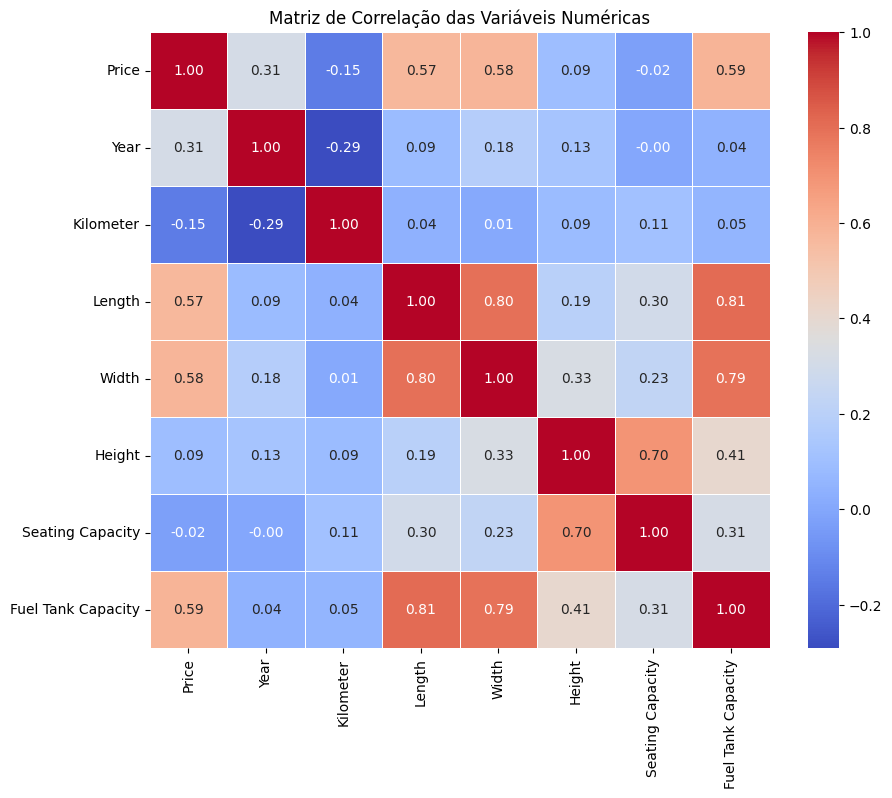

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionar apenas as variáveis numéricas
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Calcular a matriz de correlação
correlation_matrix = numeric_columns.corr()

# Plotar a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()


Exemplos de correlações - Positiva: Length and Fuel Tank Capacity (0.81), Negativa:Seating Capacity and Price (-0.02), Neutra: Seating Capacity and Year (0.00).

8. Codifique e exiba Gráficos de Dispersão para cada uma das variáveis
numéricas em relação à variável de interesse *Price*.

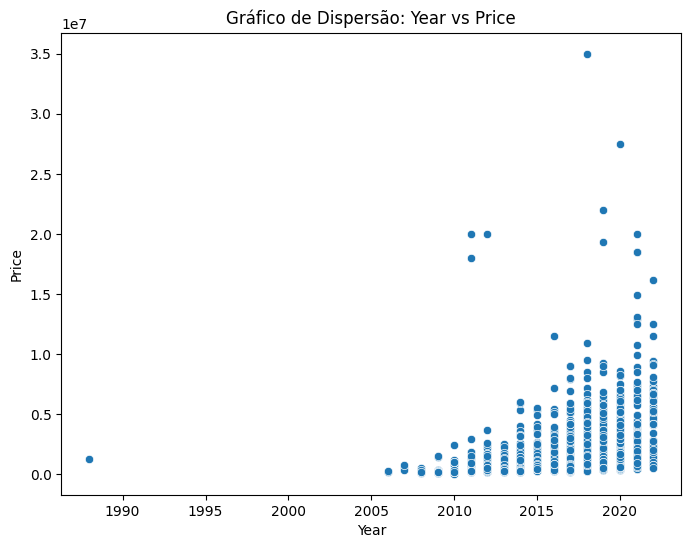

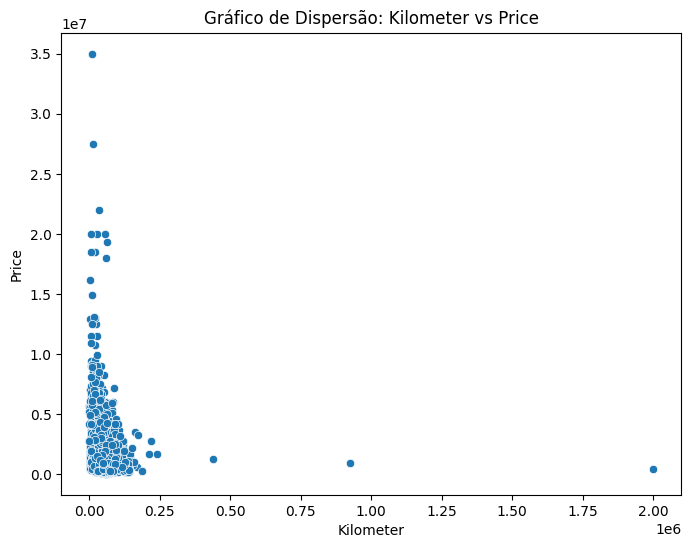

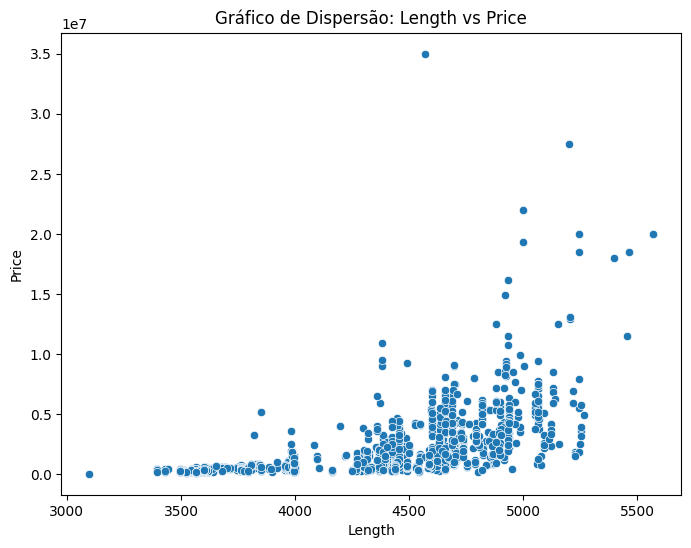

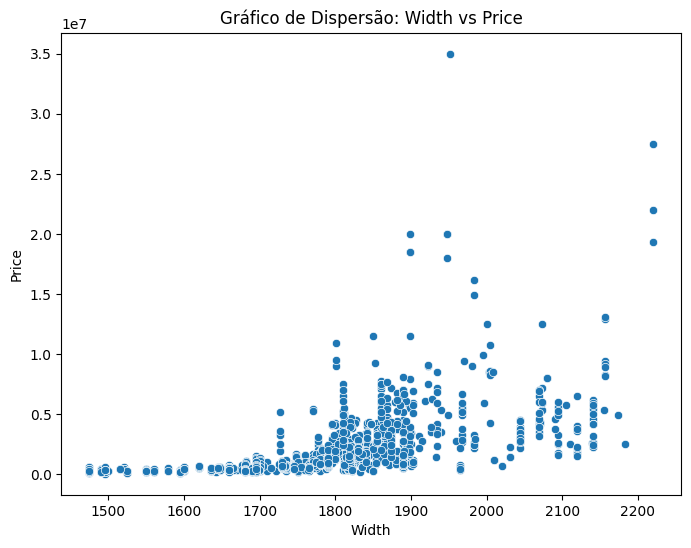

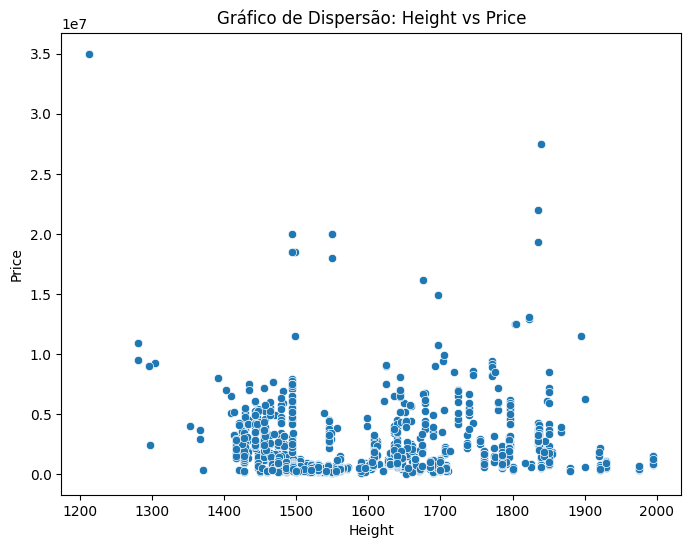

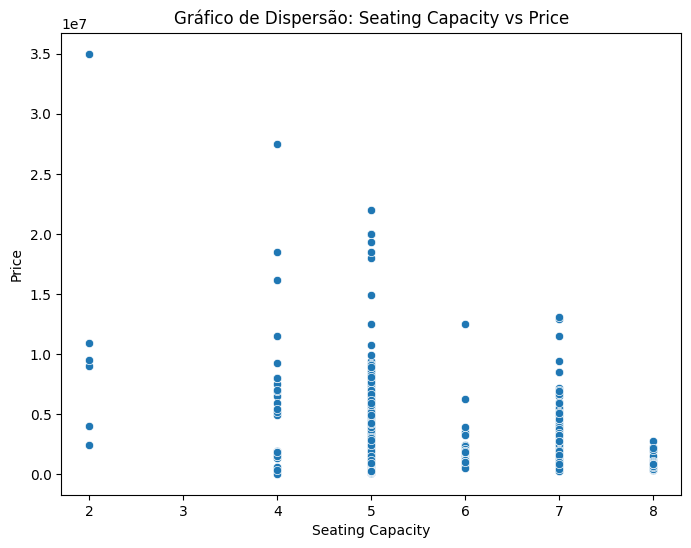

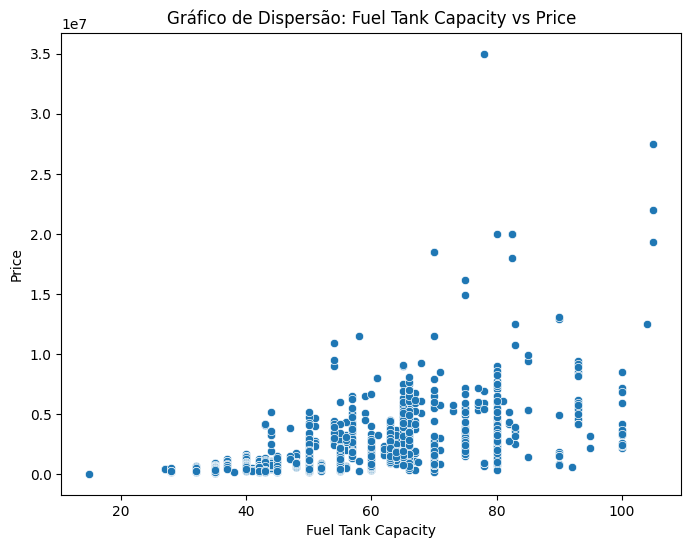

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionar apenas as variáveis numéricas e a variável de interesse "Price"
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
numeric_columns['Price'] = df['Price']

# Plotar gráficos de dispersão para cada variável numérica em relação a "Price"
for column in numeric_columns.columns:
    if column != 'Price':
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=df, x=column, y='Price')
        plt.title(f'Gráfico de Dispersão: {column} vs Price')
        plt.xlabel(column)
        plt.ylabel('Price')
        plt.show()


9. Crie um modelo de Regressão Linear Simples, exiba a Tabela de
Regressão e exiba o plot da Reta Estimada.


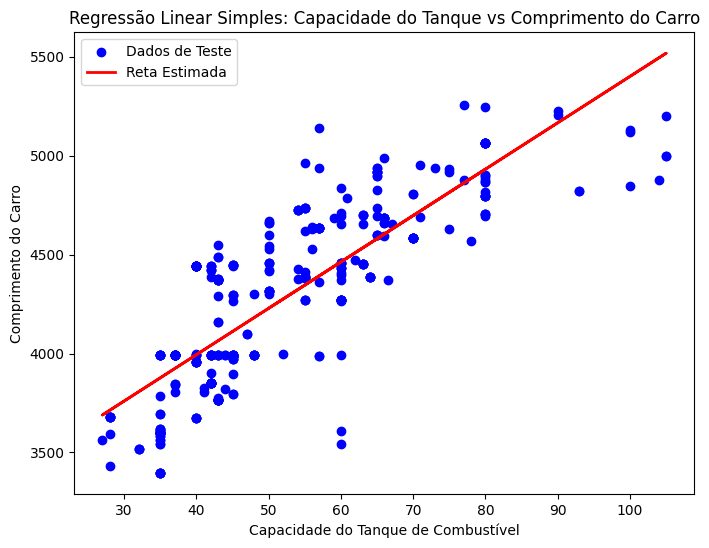

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Supondo que você já tenha carregado seus dados em um DataFrame chamado df

# Selecionar a variável independente (feature) e a variável dependente (target)
X = df['Fuel Tank Capacity'].values.reshape(-1, 1)  # Variável independente: Capacidade do Tanque de Combustível
y = df['Length'].values  # Variável dependente: Comprimento

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = model.predict(X_test)

# Plotar o gráfico de dispersão com a reta estimada
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Dados de Teste')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Reta Estimada')
plt.title('Regressão Linear Simples: Capacidade do Tanque vs Comprimento do Carro')
plt.xlabel('Capacidade do Tanque de Combustível')
plt.ylabel('Comprimento do Carro')
plt.legend()
plt.show()


10. Codifique e exiba o gráfico dos resíduos do modelo de Regressão
Simples.


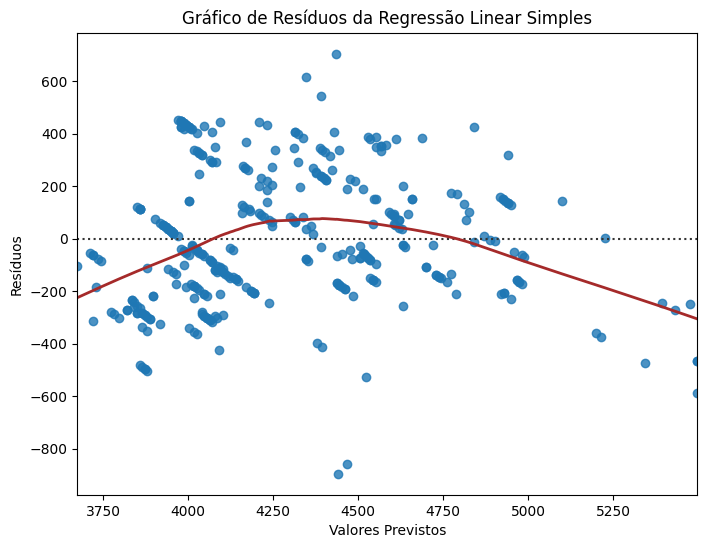

In [ ]:
# Calculando os resíduos do modelo
residuos = y_test - y_pred

# Plotando o gráfico dos resíduos
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuos, lowess=True, line_kws={'color': 'brown', 'lw': 2})
plt.title('Gráfico de Resíduos da Regressão Linear Simples')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.show()


11. Crie um modelo de Regressão Multivariada, exiba a Tabela de Regressão e exiba o gráfico dos resíduos do modelo.

RMSE: 230.49580661829168

Tabela de Regressão:
                    Coeficiente
Fuel Tank Capacity    12.911550
Seating Capacity      31.801405
Year                  -1.376042
Width                  1.461436


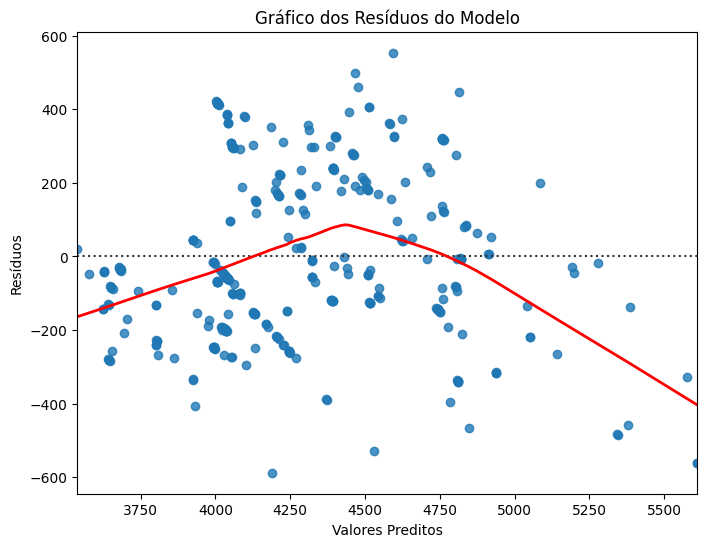

In [ ]:
# Selecionar as variáveis independentes (features) e a variável dependente (target)
X = df[['Fuel Tank Capacity', 'Seating Capacity', 'Year', 'Width']]

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = model.predict(X_test)

# Calcular o erro quadrático médio (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

# Tabela de Regressão
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coeficiente'])
print("\nTabela de Regressão:")
print(coefficients)

# Calcular os resíduos
residuals = y_test - y_pred

# Criar DataFrame com os valores preditos e os resíduos
residuals_df = pd.DataFrame({'Predicted': y_pred, 'Residuals': residuals})

# Gráfico dos resíduos do modelo
plt.figure(figsize=(8, 6))
sns.residplot(data=residuals_df, x='Predicted', y='Residuals', lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.title('Gráfico dos Resíduos do Modelo')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.show()
